In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf 
import keras 
import keras.backend as K
from scipy.spatial.distance import pdist 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
def load_attrition_data():
    dataset = pd.read_csv("employee-attrition.csv")
    return(dataset)

def pdistcompute(attrition,cols):
    #attrition is the dataframe
    #cols is the subset of columns
    attrition = attrition[cols]
    pair_wise = pd.Series(pdist(attrition, 'cosine')) #finding pairwise distance between data
    count = pair_wise.groupby(pd.cut(pair_wise, [0, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1])).count() #grouping based on values
    #plotting 
    plt.plot(np.arange(len(count)),count) #general plot for all users.
    return(count)

In [42]:
attrition = load_attrition_data()
print(attrition.columns.values)
print(attrition.shape)
attrition.head()

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']
(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
attrition_encoded = attrition.iloc[:,1:].apply(LabelEncoder().fit_transform) #encoding on all except Age
attrition =  pd.concat([attrition.iloc[:,0], attrition_encoded], axis=1, sort=False)
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,49,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,37,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,33,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,27,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2


In [5]:
full_cols = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [6]:
def privacy_apriori_analysis(full_cols):
    print("<=0.5 implies COMPLETE PRIVACY\n>0.5 implies PRIVACY VIOLATING ATTRIBUTE")
    fset_80 = [] #With value greater than 0.80
    fset_50 = [] #with value greater than 0.5 but less than 80
    fset_low = [] 
    for i in range(len(full_cols)):
        cols = full_cols[i]
        cols = [cols] + ['YearsWithCurrManager']
        count = pdistcompute(attrition,cols)
        if ((full_cols[i] != 'YearsWithCurrManager') & (np.sum(count) != 0)):
            #YearsWithCurrManager is used as reference and ignored for analysis 
            #count = 0 implies all same values for col 
            #print(full_cols[i] + str(":\t") + str(count[0]/sum(count)))
            if (count[0]/sum(count) >= 0.8):
                fset_80.append(full_cols[i])
            if ((count[0]/sum(count) < 0.8) & (count[0]/sum(count) >=0.5)):
                fset_50.append(full_cols[i])
            if ((count[0]/sum(count) < 0.5)):
                fset_low.append(full_cols[i])
    return(fset_80,fset_50,fset_low)

<=0.5 implies COMPLETE PRIVACY
>0.5 implies PRIVACY VIOLATING ATTRIBUTE


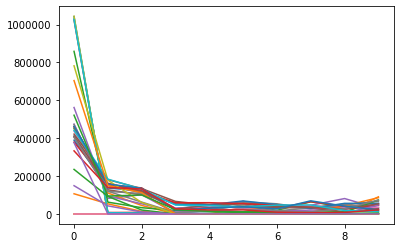

In [7]:
private_attr = [] #Contains all list of private attributes 
fset_80, fset_50,fset_low = privacy_apriori_analysis(full_cols)
fset_80 #first set of privacy violating attributes
private_attr = fset_80

In [15]:
fset_80

['Age',
 'DailyRate',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany',
 'TrainingTimesLastYear']

In [8]:
fset_50 #second set of quasi identifiers 

['Department',
 'Gender',
 'JobLevel',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole']

In [11]:
fset_low #Lower risk variables 

['Attrition',
 'BusinessTravel',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsSinceLastPromotion']

TotalWorkingYears
YearsAtCompany


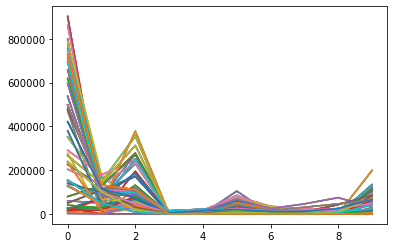

In [12]:
def privacy_attr_apriori_2(attrition, fset_50,fset):
    #fset -> fset_50 or fset_low
    second_list = [];
    for i in range(len(fset_50)): 
        for j in range(len(fset)):
            if (fset_50[i] != fset[j]):
                cols = [fset_50[i]] + [fset[j]]
                count = pdistcompute(attrition,cols)
                #print(set(cols)) 
                if (count[0]/sum(count) > 0.75):
                    #print(cols, str(count[0]/sum(count)))
                    second_list.append(cols[1])
    return(second_list)

#CHANGE THIS FUNCTION TO PRINT TOP FIVE
def most_common(lst):
    return max(set(lst), key=lst.count)

#Removing Quasi identifiers 
second_list = privacy_attr_apriori_2(attrition, fset_50,fset_50)
print(most_common(second_list)) 
private_attr.append(most_common(second_list)) #Contains all list of private attributes
fset_50.remove(most_common(second_list))

second_list = privacy_attr_apriori_2(attrition, fset_50,fset_50)
print(most_common(second_list)) 
private_attr.append(most_common(second_list)) #Contains all list of private attributes
fset_50.remove(most_common(second_list))

TrainingTimesLastYear


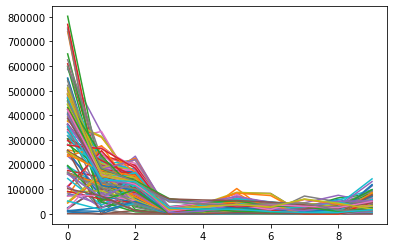

In [13]:
third_list = privacy_attr_apriori_2(attrition, fset_50,fset_low)
print(most_common(third_list))
private_attr.append(most_common(third_list)) 

In [14]:
private_attr #First metric Using frequent mining 

['Age',
 'DailyRate',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany',
 'TrainingTimesLastYear']

In [98]:
#Second Metric - unique_attr 
def unique_feat(attrition,cols):
    attrition = attrition[cols]
    return(len(np.unique(attrition)))

ulst = {} #dictionary containing col name and values
for i in range(len(full_cols)):
    cols = full_cols[i]
    ulst[cols] =  len(attrition)/unique_feat(attrition,cols)

import operator
sorted_ulst = sorted(ulst.items(), key=operator.itemgetter(1))
#print("Attributes, Average Group Size")
unique_attr = []
for k,v in sorted_ulst:
    if v < 55: 
        #print(k,v) 
        unique_attr.append(k)

unique_attr

['EmployeeNumber',
 'MonthlyRate',
 'MonthlyIncome',
 'DailyRate',
 'HourlyRate',
 'Age',
 'TotalWorkingYears',
 'YearsAtCompany',
 'DistanceFromHome']

In [31]:
#Uniqueness fails to look for uniqueness within an attribute 
#Third Metric - Finding uniqueness within an attribute - in imbalanced dataset 
df = attrition.groupby('Age')['Age'].count()
print (df.min())

4


In [117]:
alst = {}
for i in range(len(full_cols)):
    cols = full_cols[i]
    mval = (attrition.groupby(cols)[cols].count()).min()
    print(cols + str(':') + str(mval))
    alst[cols] =  1/mval

sorted_alst = sorted(alst.items(), key=operator.itemgetter(1))
#print("Attributes, Average Group Size")
imbalance_attr = []
threshold = 0.2 #(1 in 20 records)
for k,v in sorted_alst:
    if v > threshold: 
        #print(k,v) 
        imbalance_attr.append(k)
imbalance_attr

Age:4
Attrition:237
BusinessTravel:150
DailyRate:1
Department:63
DistanceFromHome:12
Education:48
EducationField:27
EmployeeCount:1470
EmployeeNumber:1
EnvironmentSatisfaction:284
Gender:588
HourlyRate:12
JobInvolvement:83
JobLevel:69
JobRole:52
JobSatisfaction:280
MaritalStatus:327
MonthlyIncome:1
MonthlyRate:1
NumCompaniesWorked:49
Over18:1470
OverTime:416
PercentSalaryHike:18
PerformanceRating:226
RelationshipSatisfaction:276
StandardHours:1470
StockOptionLevel:85
TotalWorkingYears:1
TrainingTimesLastYear:54
WorkLifeBalance:80
YearsAtCompany:1
YearsInCurrentRole:2
YearsSinceLastPromotion:6
YearsWithCurrManager:2


['Age',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'DailyRate',
 'EmployeeNumber',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany']

In [115]:
clst = {}
threshold = 0.95 #(1 in 10 records)
for i in range(len(full_cols)):
    for j in range(len(full_cols)):
        if full_cols[i] not in imbalance_attr:
            if full_cols[j] not in imbalance_attr:
                if full_cols[i] != full_cols[j]:
                    cols = [full_cols[i]] + [full_cols[j]]
                    mval = (attrition.groupby(cols)[cols].count()).min()
                    value = 1/mval[0]
                    if value > threshold:
                        #print(str(cols) + str(value))
                        if cols[0] not in clst.keys():
                            clst[cols[0]] = 1
                        else: 
                            clst[cols[0]] = clst[cols[0]] + 1
sorted_clst = sorted(clst.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_clst)
second_attr = []
count = 0
for k, v in sorted_clst:
    if count < 5:
        second_attr.append(k)
        count = count + 1; 

    else: 
        break;
second_attr

[('HourlyRate', 21), ('YearsSinceLastPromotion', 21), ('DistanceFromHome', 17), ('PercentSalaryHike', 14), ('NumCompaniesWorked', 10), ('TrainingTimesLastYear', 10), ('EducationField', 8), ('JobLevel', 8), ('JobRole', 8), ('Education', 7), ('WorkLifeBalance', 7), ('Department', 6), ('JobInvolvement', 4), ('StockOptionLevel', 4), ('Attrition', 3), ('BusinessTravel', 3), ('JobSatisfaction', 3), ('PerformanceRating', 3), ('RelationshipSatisfaction', 3), ('EnvironmentSatisfaction', 2), ('MaritalStatus', 2), ('OverTime', 2)]


['HourlyRate',
 'YearsSinceLastPromotion',
 'DistanceFromHome',
 'PercentSalaryHike',
 'NumCompaniesWorked']

# Transformation Logic
#Step1: Find features that can lead to better prediction - f_subset: subset of features used for task prediction 
#Step2: pdistcompute on dataframe(f_subset) to find unique ones that can be used to distinguish users 
#@ADVERSARY: semi-honest adversary who uses all insider knowledge to learn aout user private information; 
#@ADVERSARY: One who is knowledgable about data preparation  

#Objective 1: Protect identified sensitive attributes (Age,Distance) so @ADVERSARY cannot de-identify individual 
#These attributes are ones that can be used by adversary to identify individuals using age, gender, location (PUBLIC). 
#Using DE-IDENTIFICATION, PRIVATE information such as monthly income, monthly rate, daily rate, percent salary hike, performance rating etc...
#Protect deidentification using PUBLIC attributes which will protect PRIVATE attributes 

#Objective 2: Protect sensitive hidden inferences from published data - a case where same data can be used 
#to make multiple classes - using attrition data to predict suicide 


In [183]:
from sklearn.model_selection import train_test_split
#Step 1 using a classifier to predict attrition from input data 
feat = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

label = ['Attrition']
X = attrition[feat]
y = attrition[label]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 30% test

In [186]:
PRIVACY_FLAG = 1
if PRIVACY_FLAG == 1:
    for ele in private_attr: 
        feat.remove(ele)
        X_train = X_train[feat]
        X_test = X_test[feat]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1176, 25) (1176, 1)
(294, 25) (294, 1)


Accuracy: 0.9013605442176871


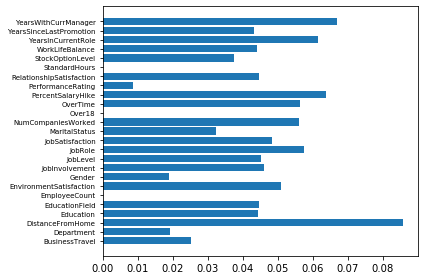

In [187]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plt.barh(feat,clf.feature_importances_)
plt.yticks(fontsize=7)
plt.tight_layout()